# Data Ingestion & Wrangling
### Shoutout to whoever this person is: https://github.com/adinutzyc21/apartments-scraper for the scraper which saved us a lot of time and effort. Here is a screenshot of the scraped data from the linked code:

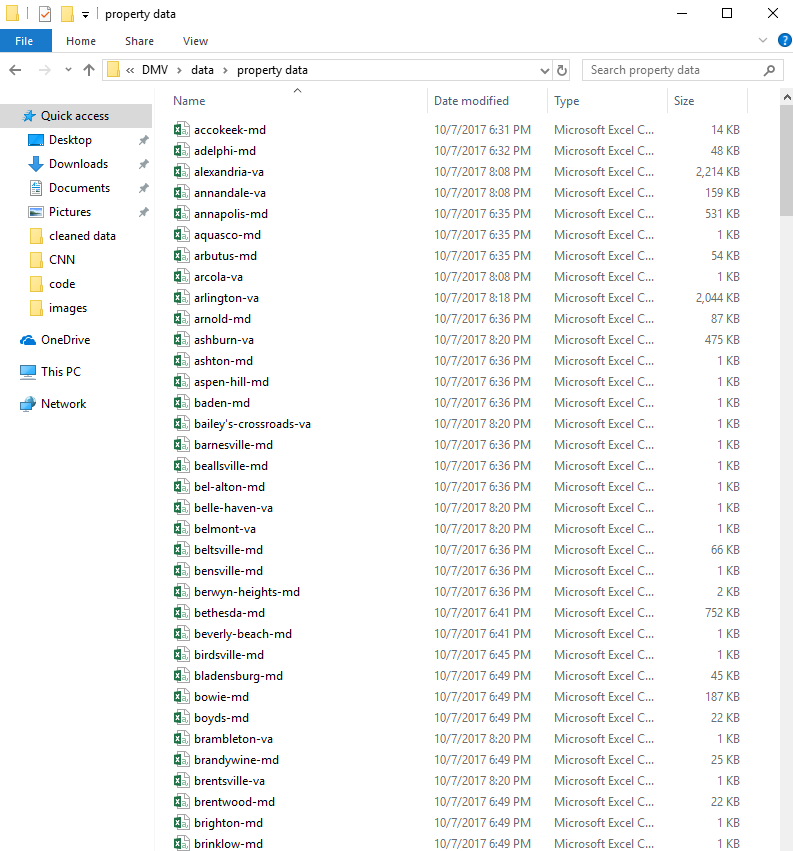

In [1]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'city_files.png')

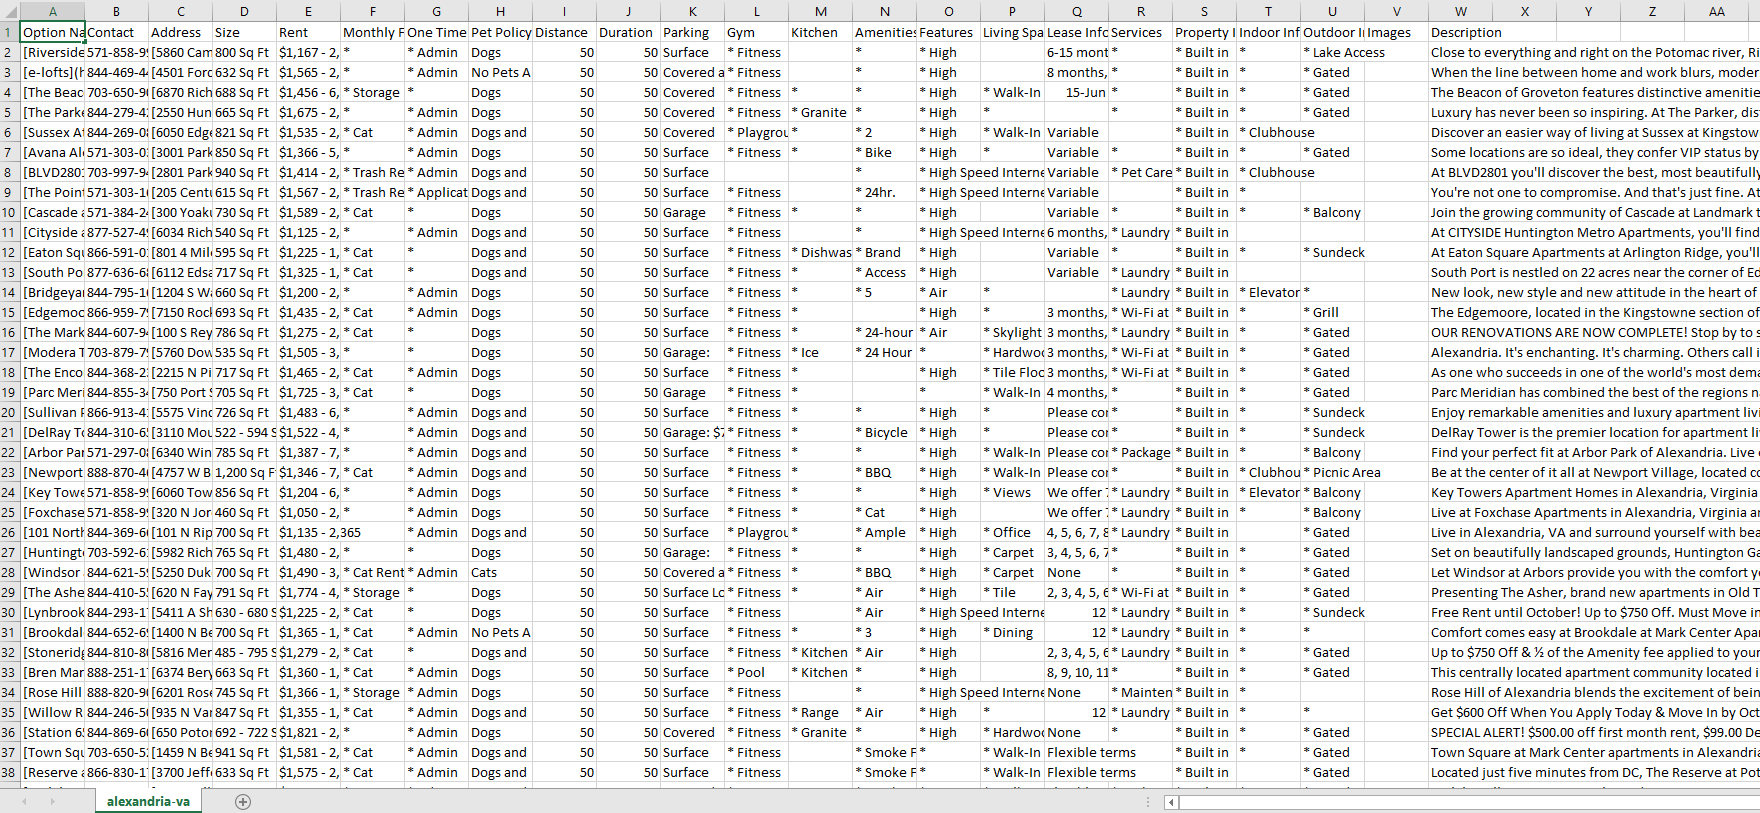

In [2]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Alexandria_CSV.png')

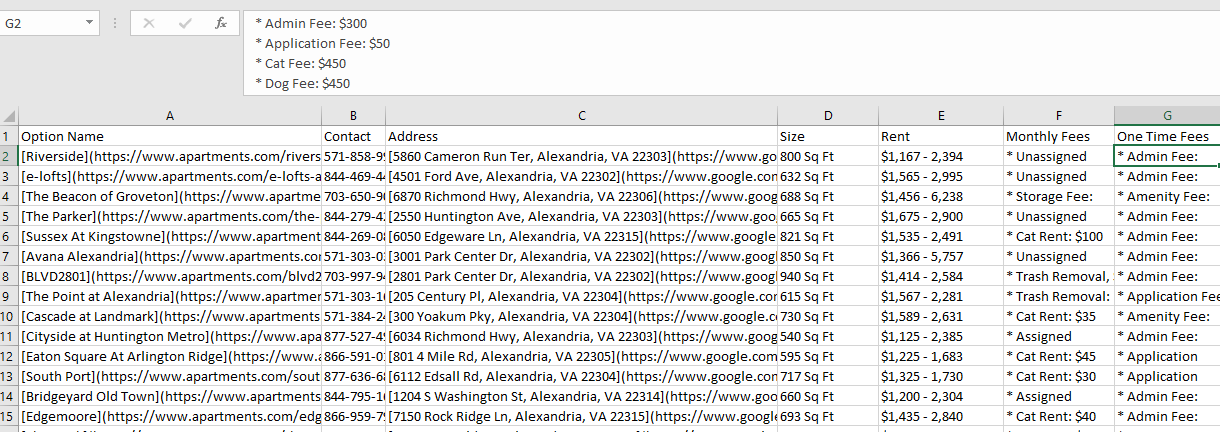

In [1]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Alexandria_CSV_Close_Up.png')

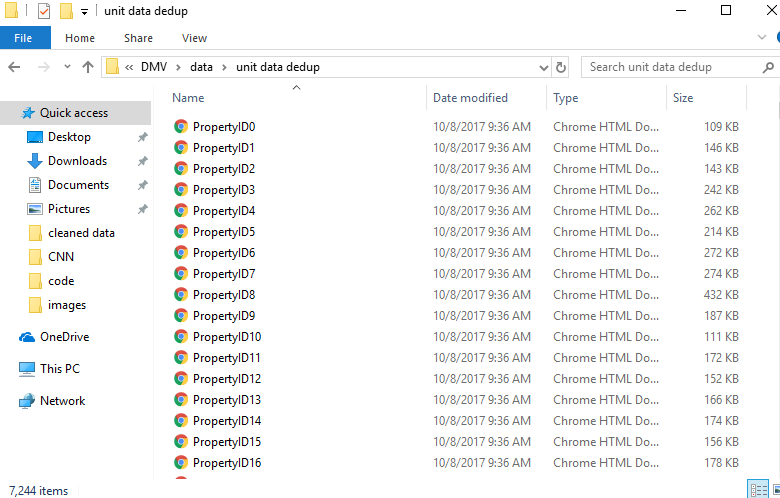

In [3]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Unit_Files.png')

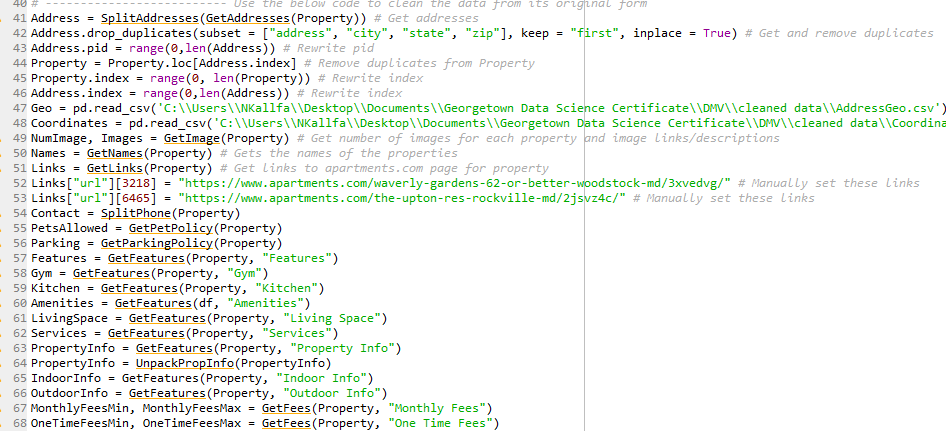

In [4]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Custom_Cleaning_Functions.png')

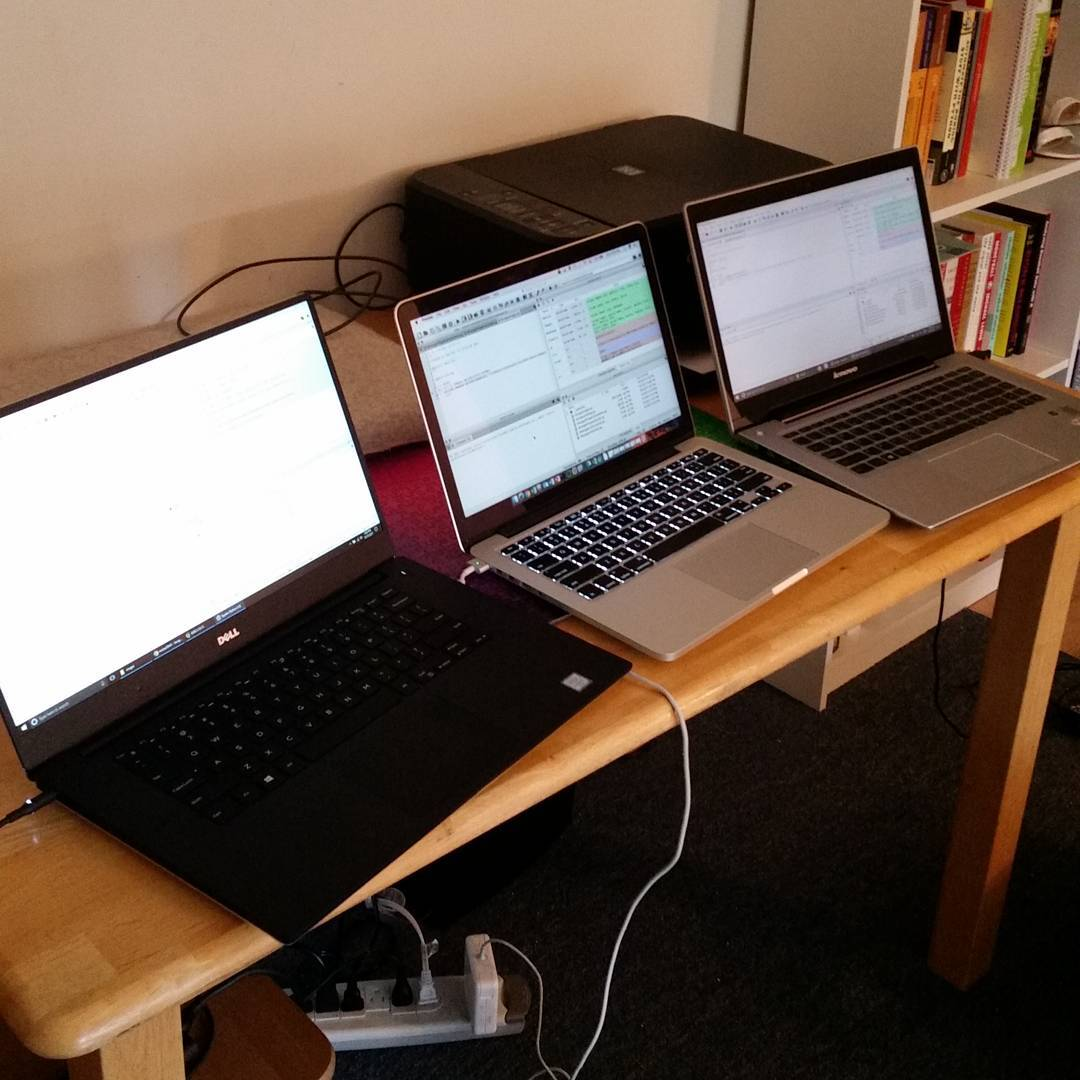

In [7]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Image_Scraping.jpg')

# Google Vision API

In [9]:
# Import required packages and functions
import io
import os
import pandas as pd
from google.cloud import vision
from google.cloud.vision import types

# Set Google API authentication and set folder where images are stored
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'PATH TO JSON FILE'
ImageFolder = 'PATH TO DIRECTORY WHERE IMAGES ARE STORED'

# Placeholders to store data
ImageID = []
MID = []
Description = []
Score = []

# Create empty data frame and vision API client
ImageLabels = pd.DataFrame()
client = vision.ImageAnnotatorClient()

# Get labels and scores for every image in folder
for file in os.listdir(ImageFolder):
    filename = os.path.basename(file).split('.')[0] # Get image ID
    image_file = io.open(ImageFolder+file, 'rb') # Open image
    content = image_file.read() # Read image into memory
    image = types.Image(content=content) # Does something
    response = client.label_detection(image=image) # Gets response from API for image
    labels = response.label_annotations # Get labels from response
    Nlabels = len(labels) # Get the number of labels that were returned
    for i in range(0, Nlabels): # For each label we will store the MID, label, and score
        ImageID.append(filename) # Keep track Image ID
        MID.append(labels[i].mid) # Store MID
        Description.append(labels[i].description) # Store label
        Score.append(labels[i].score) # Store score of label

# Put Image ID, MID, label, and score into data frame
ImageLabels["imageid"] = ImageID
ImageLabels["mid"] = MID
ImageLabels["desc"] = Description
ImageLabels["score"] = Score

ModuleNotFoundError: No module named 'google.cloud'

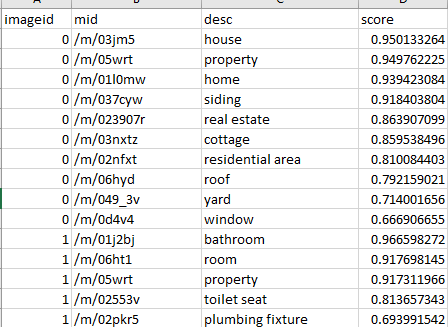

In [11]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Image_Labels_From_Google.png')

## CNN Stuff
Found a tutorial (https://www.tensorflow.org/tutorials/image_recognition) on how to use a pre-trained CNN to train an image classifier. Decided to follow this tutorial using images I downloaded to classify an image as being one of:

1.  bathroom 
2. bedroom 
3. floorplan 
4. homes  
5. kitchen

These were the 5 most common labels that came from the Google Vision API. Ultimately trained the model on 12,500 (2,500 from each class) 100×100 color images and it took about 1 hour to run. Some labels were much more common than others (10,000 houses, but only 2,500 bedrooms). I wanted to keep the size of each class the same so I ended up just using 2,500 images for each class. This was a straightforward application of CNNs...I also wanted to see if I could classify an image of an apartment as being above/below average rent.  

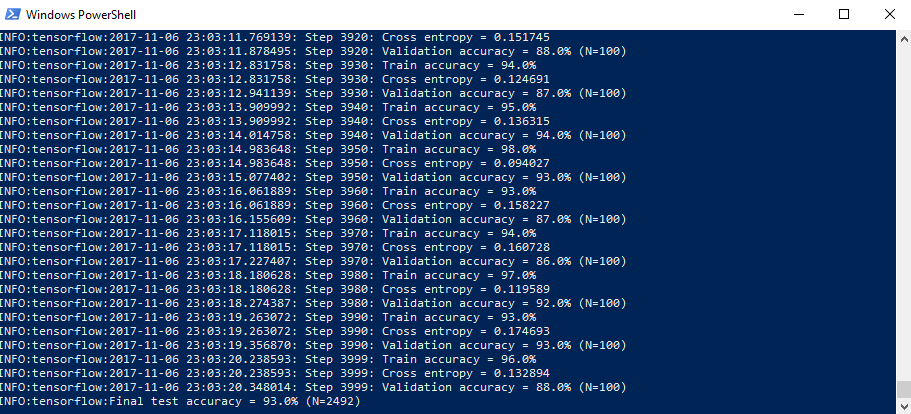

In [12]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Output_From_CNN_Training.png')

In [4]:
python label_image.py --graph=C:\Users\NKallfa\Desktop\CNN_Models\Pretrained\Class5\output_graph.pb --labels=C:\Users\NKallfa\Desktop\CNN_Models\Pretrained\Class5\output_labels.txt --image=C:\Users\NKallfa\Desktop\CNN\kitch3.jpg

SyntaxError: invalid syntax (<ipython-input-4-d6c6191239b2>, line 1)

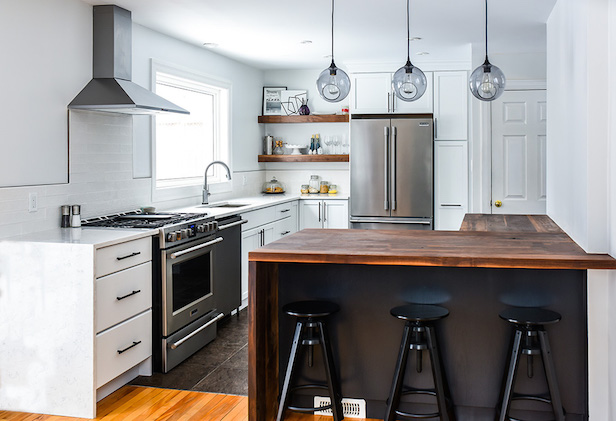

In [5]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\CNN\\'
Image(filename=file + 'kitch3.jpg')

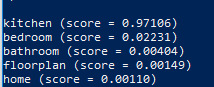

In [6]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'score.png')

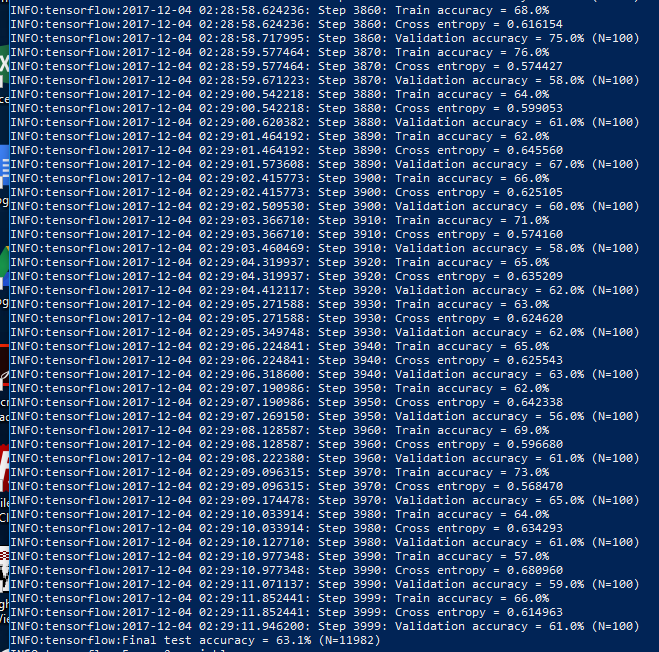

In [8]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Above_Below_Avg_Rent.png')

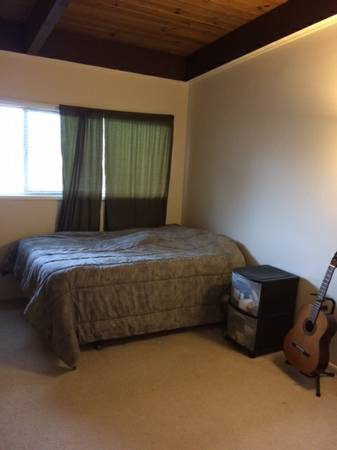

In [1]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\CNN\\'
Image(filename=file + 'Below2.jpg')

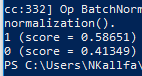

In [2]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'score_rent.png')